<a href="https://colab.research.google.com/github/ytz825/Micro-Credentials-Course/blob/main/Covid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',35)
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
927004,2021-01-13,Teton,Wyoming,56039.0,2502,4.0
927005,2021-01-13,Uinta,Wyoming,56041.0,1774,9.0
927006,2021-01-13,Washakie,Wyoming,56043.0,829,23.0


In [26]:
#filtering the data to the most recent 30 days
df30 = df[df['date']>='2020-12-15']
df30

,date,county,state,fips,cases,deaths
829648,2020-12-15,Autauga,Alabama,1001.0,3426,43.0
829649,2020-12-15,Baldwin,Alabama,1003.0,11061,141.0
829650,2020-12-15,Barbour,Alabama,1005.0,1292,30.0
829651,2020-12-15,Bibb,Alabama,1007.0,1504,39.0
829652,2020-12-15,Blount,Alabama,1009.0,3881,49.0
...,...,...,...,...,...,...
927003,2021-01-13,Sweetwater,Wyoming,56037.0,3222,26.0
927004,2021-01-13,Teton,Wyoming,56039.0,2502,4.0
927005,2021-01-13,Uinta,Wyoming,56041.0,1774,9.0
927006,2021-01-13,Washakie,Wyoming,56043.0,829,23.0


In [27]:
#filtering NY as state
dfnyc = df30[df30['county'] == 'New York City']
dfnyc

,date,county,state,fips,cases,deaths
831522,2020-12-15,New York City,New York,NaN,367198,24561.0
834768,2020-12-16,New York City,New York,NaN,370109,24578.0
838014,2020-12-17,New York City,New York,NaN,373320,24613.0
841259,2020-12-18,New York City,New York,NaN,377728,24652.0
844505,2020-12-19,New York City,New York,NaN,381067,24677.0
847750,2020-12-20,New York City,New York,NaN,383808,24697.0
850995,2020-12-21,New York City,New York,NaN,387595,24735.0
854240,2020-12-22,New York City,New York,NaN,391634,24768.0
857485,2020-12-23,New York City,New York,NaN,395810,24790.0
860730,2020-12-24,New York City,New York,NaN,401251,24842.0


In [29]:
#adding new columns: daily cases and daily deaths
dfnyc['daily cases'] = dfnyc["cases"] - dfnyc["cases"].shift()
dfnyc['daily deaths'] = dfnyc['deaths'] - dfnyc['deaths'].shift()
dfnyc

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,county,state,fips,cases,deaths,daily cases,daily deaths
831522,2020-12-15,New York City,New York,NaN,367198,24561.0,NaN,NaN
834768,2020-12-16,New York City,New York,NaN,370109,24578.0,2911.0,17.0
838014,2020-12-17,New York City,New York,NaN,373320,24613.0,3211.0,35.0
841259,2020-12-18,New York City,New York,NaN,377728,24652.0,4408.0,39.0
844505,2020-12-19,New York City,New York,NaN,381067,24677.0,3339.0,25.0
847750,2020-12-20,New York City,New York,NaN,383808,24697.0,2741.0,20.0
850995,2020-12-21,New York City,New York,NaN,387595,24735.0,3787.0,38.0
854240,2020-12-22,New York City,New York,NaN,391634,24768.0,4039.0,33.0
857485,2020-12-23,New York City,New York,NaN,395810,24790.0,4176.0,22.0
860730,2020-12-24,New York City,New York,NaN,401251,24842.0,5441.0,52.0


In [31]:
#dropping the NaN column
dfnyc.drop(columns = ['fips'],inplace=True)
dfnyc

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,county,state,cases,deaths,daily cases,daily deaths
831522,2020-12-15,New York City,New York,367198,24561.0,NaN,NaN
834768,2020-12-16,New York City,New York,370109,24578.0,2911.0,17.0
838014,2020-12-17,New York City,New York,373320,24613.0,3211.0,35.0
841259,2020-12-18,New York City,New York,377728,24652.0,4408.0,39.0
844505,2020-12-19,New York City,New York,381067,24677.0,3339.0,25.0
847750,2020-12-20,New York City,New York,383808,24697.0,2741.0,20.0
850995,2020-12-21,New York City,New York,387595,24735.0,3787.0,38.0
854240,2020-12-22,New York City,New York,391634,24768.0,4039.0,33.0
857485,2020-12-23,New York City,New York,395810,24790.0,4176.0,22.0
860730,2020-12-24,New York City,New York,401251,24842.0,5441.0,52.0


In [76]:
#finding the total number of cases and deaths in NYC
total_cases = sum(dfnyc['cases'])
total_deaths = sum(dfnyc['deaths'])
print('The total number of cases in New York City is', str(total_cases))
print('The total number of deaths in New York City is', str(total_deaths))

The total number of cases in New York City is 12856469
The total number of deaths in New York City is 752618.0


In [61]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

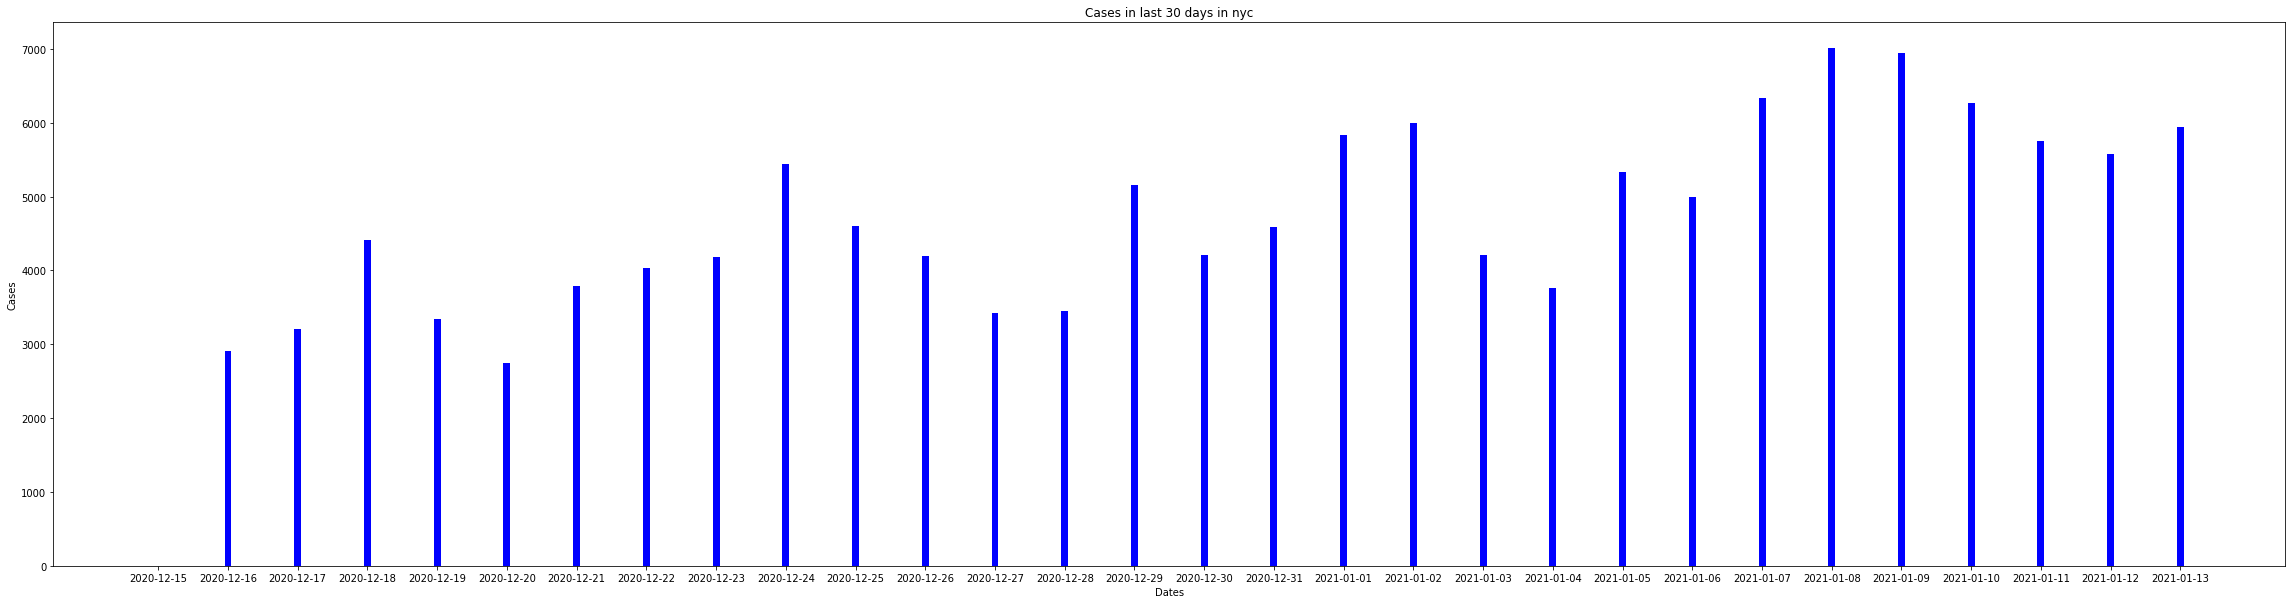

In [70]:
#creating a bar with date and cases
x = (dfnyc["date"].iloc[-30:])
y =[]
k=dfnyc["cases"].iloc[-30]
for i in  dfnyc["cases"].iloc[-30:]:
  y.append(i-k)
  k=i

fig = plt.figure(figsize = (40, 10)) 
plt.bar(x, y, color ='blue',  
        width = 0.1) 
plt.xlabel("Dates") 
plt.ylabel("Cases") 
plt.title("Cases in last 30 days in nyc") 
plt.show() 

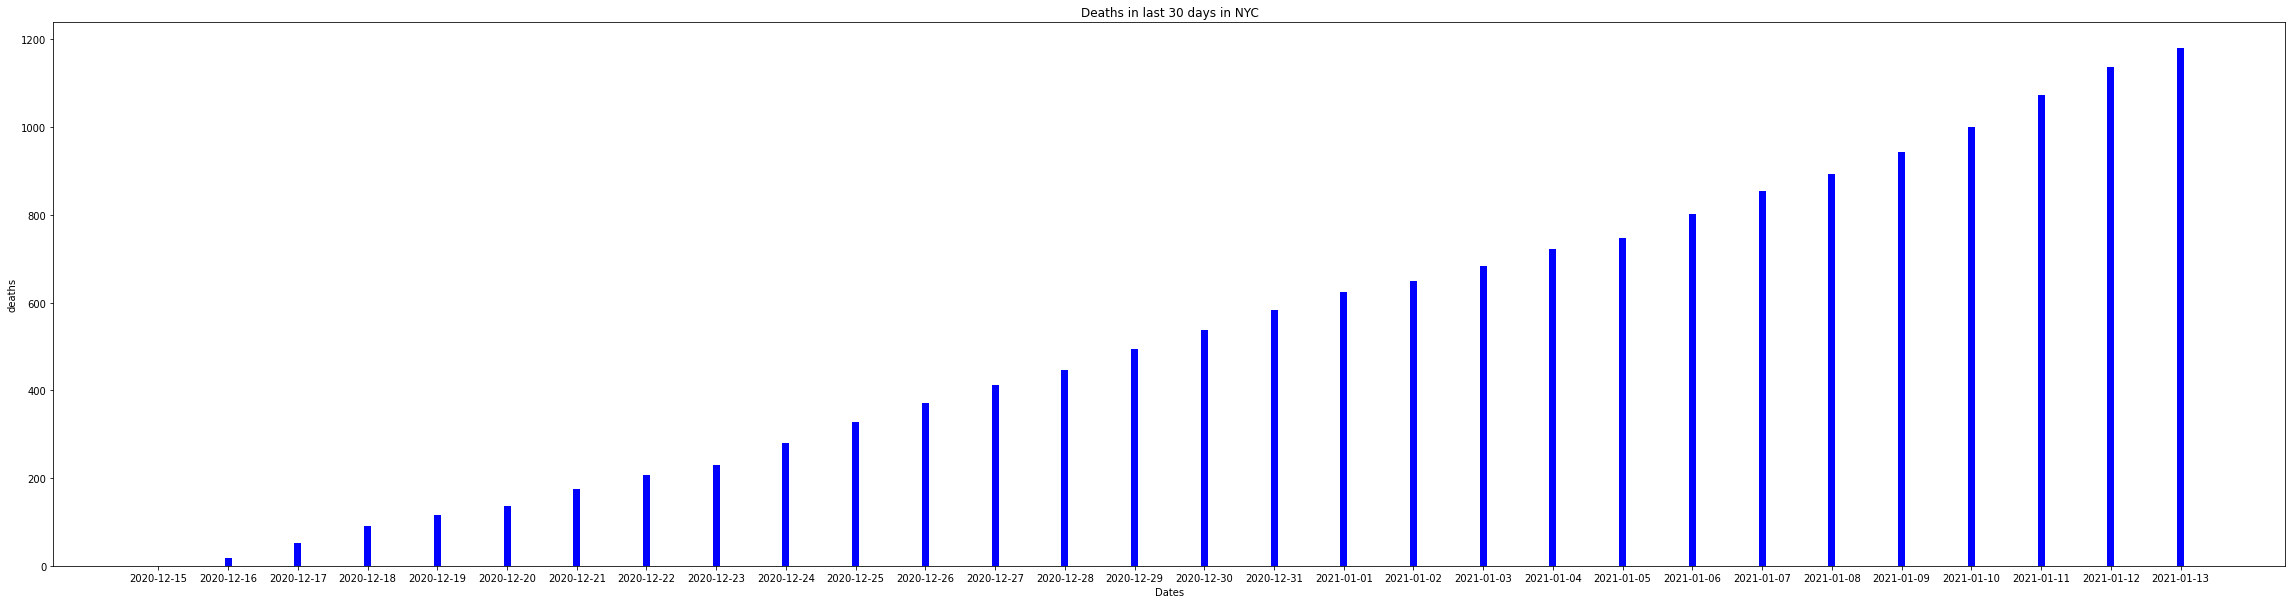

In [72]:
#creating a bar plot with date and deaths
x = (dfnyc["date"].iloc[-30:])
y =[]
k=dfnyc["deaths"].iloc[-30]
for i in  dfnyc["deaths"].iloc[-30:]:
  y.append(i-k)

fig = plt.figure(figsize = (40, 10)) 
  
plt.bar(x, y, color ='blue',  
        width = 0.1) 
  
plt.xlabel("Dates") 
plt.ylabel("deaths") 
plt.title("Deaths in last 30 days in NYC") 
plt.show() 

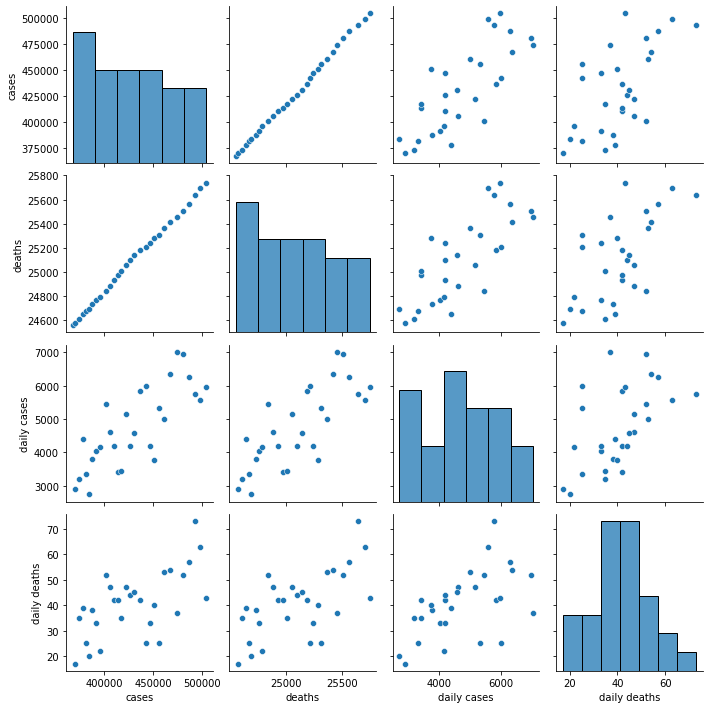

In [36]:
sns.pairplot(dfnyc)

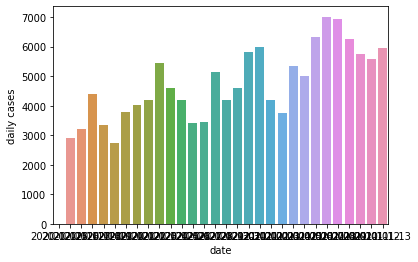

In [37]:
#creating a bar plot with date and daily cases
sns.barplot(x='date',y='daily cases',data=dfnyc)

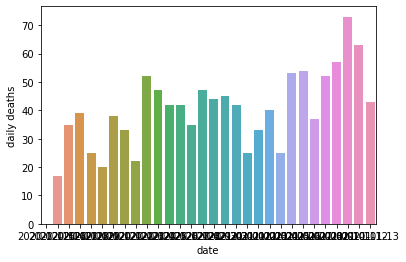

In [38]:
#creating a bar plot with date and daily deaths
sns.barplot(x='date',y='daily deaths',data=dfnyc)

In [39]:
#comparing different state and counties
pd.set_option('display.max_rows',999)
df30.groupby(['state','county']).sum()

fips   cases  deaths
state   county                               
Alabama Autauga       30030.0  125996  1442.0
        Baldwin       30090.0  401258  4779.0
        Barbour       30150.0   44299   981.0
        Bibb          30210.0   54155  1333.0
        Blount        30270.0  137466  1869.0
...                       ...     ...     ...
Wyoming Sweetwater  1681110.0   87717   530.0
        Teton       1681170.0   64513    91.0
        Uinta       1681230.0   46292   219.0
        Washakie    1681290.0   22595   485.0
        Weston      1681350.0   14232    76.0

[3249 rows x 3 columns]

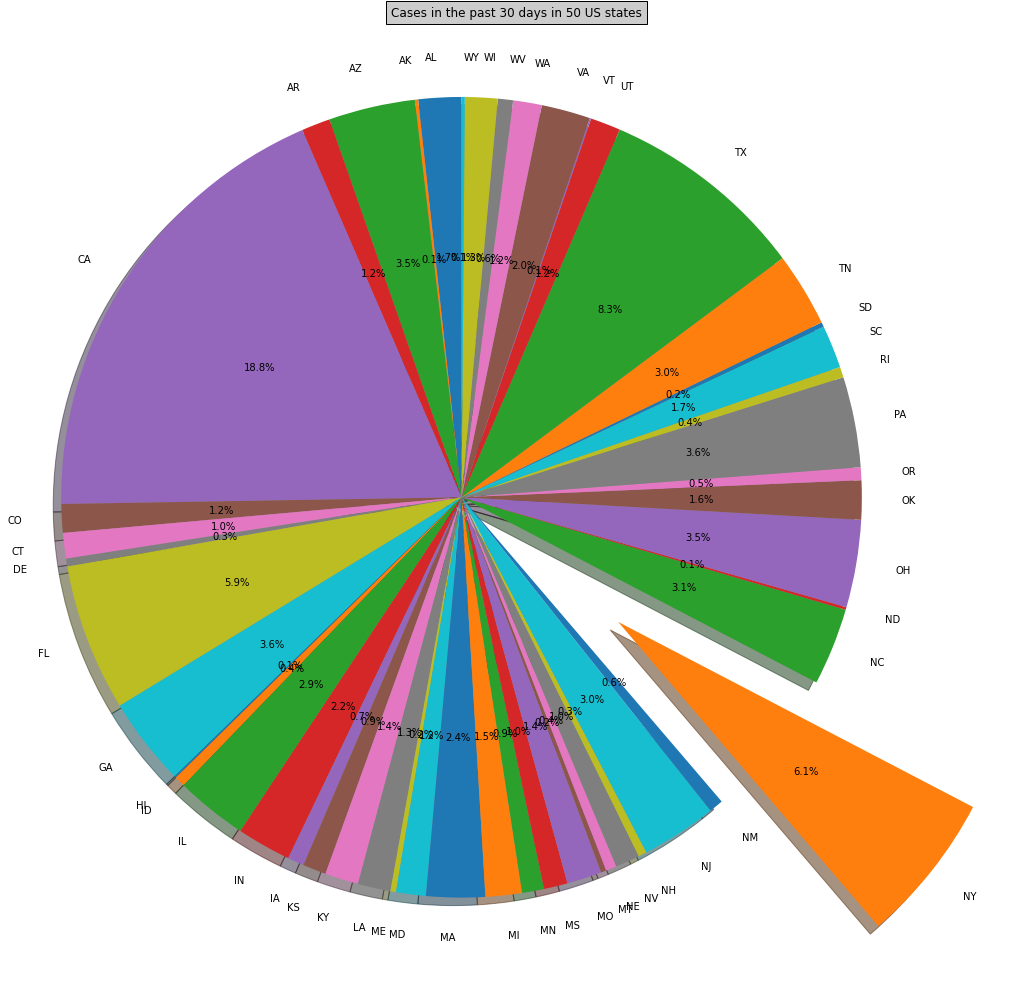

In [83]:
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cases_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]

    cases_us_states.append(((currState['cases'].where(currState["date"]==yesterday)).sum())-((currState['cases'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cases_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Cases in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()

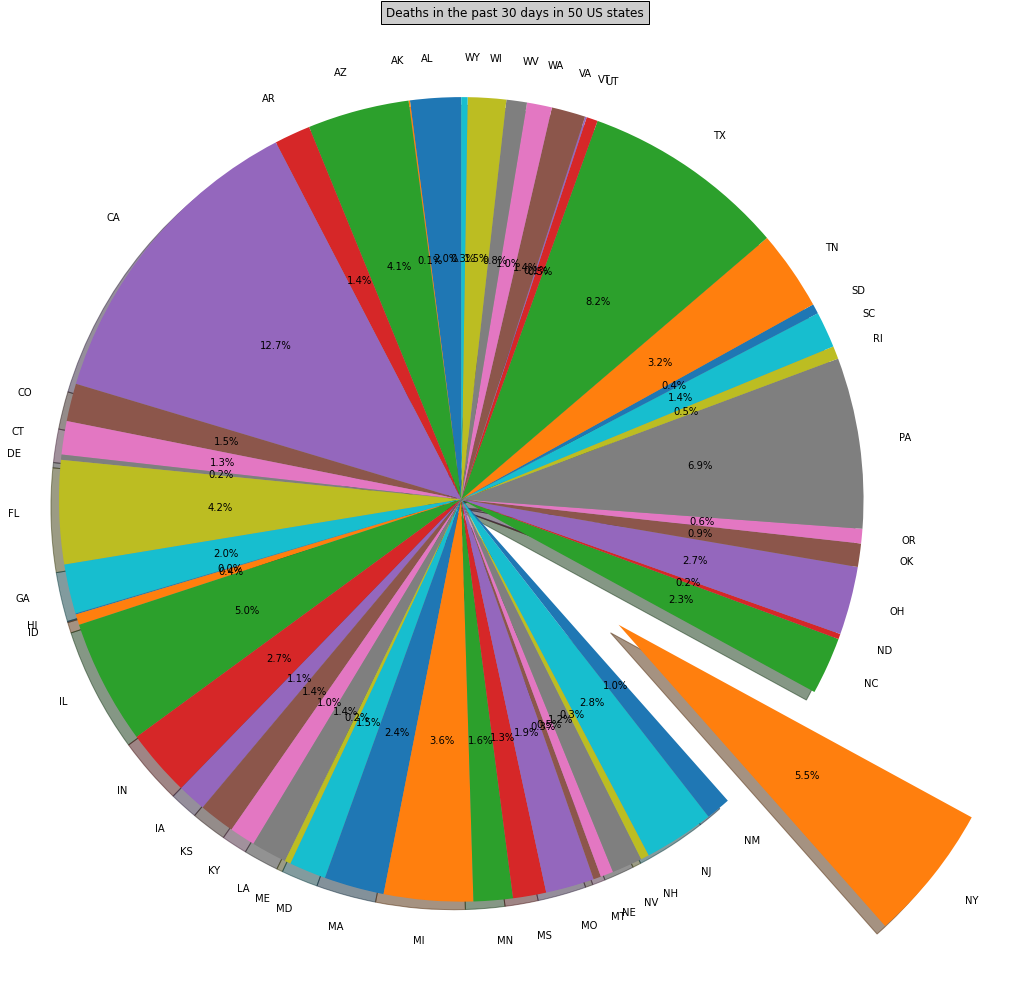

In [84]:
from datetime import date, timedelta

yesterday = (date.today()-timedelta(days=2)).isoformat()
thirtydaysago = (date.today()-timedelta(days=30)).isoformat()
us_states =["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]
abbr_states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE", "FL", "GA","HI", "ID", 
               "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", "MA", "MI", "MN", "MS", "MO",
               "MT", "NE", "NV", "NH", "NJ", "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", 
               "RI", "SC", "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

cases_us_states=[]
for i in us_states:
    currState = df[df['state'] == i]

    cases_us_states.append(((currState['deaths'].where(currState["date"]==yesterday)).sum())-((currState['deaths'].where(currState["date"]==thirtydaysago)).sum()))

import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
# explode makes NY stand out from the others
explode=(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
fig1, ax1 = plt.subplots()
ax1.pie(cases_us_states, explode=explode, labels=abbr_states, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1 = plt.gcf()
fig1.set_size_inches(18,18) # or (4,4) or (5,5) or whatever
plt.title("Deaths in the past 30 days in 50 US states" ,bbox={'facecolor':'0.8', 'pad':5})

plt.show()

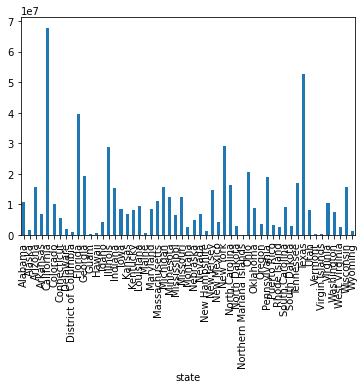

In [54]:
#creating a bar plot with state and total number of cases
df30.groupby(['state'])['cases'].sum().plot(kind='bar')

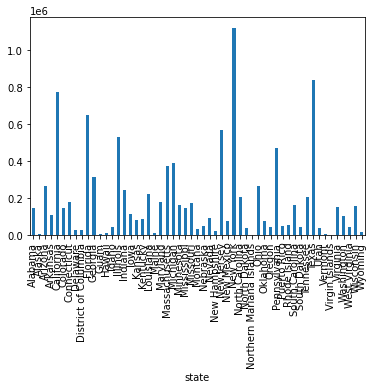

In [55]:
#creating a bar plot with state and total number of deaths
df30.groupby(['state'])['deaths'].sum().plot(kind='bar')

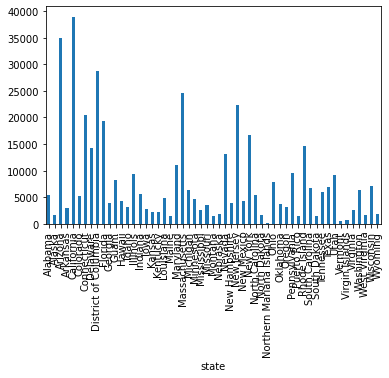

In [42]:
#creating a bar plot with state and average number of cases
df30.groupby(['state'])['cases'].mean().plot(kind='bar')

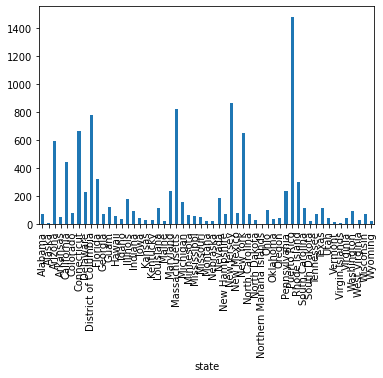

In [47]:
#creating a bar plot with state and average number of deaths
df30.groupby(['state'])['deaths'].mean().plot(kind='bar')

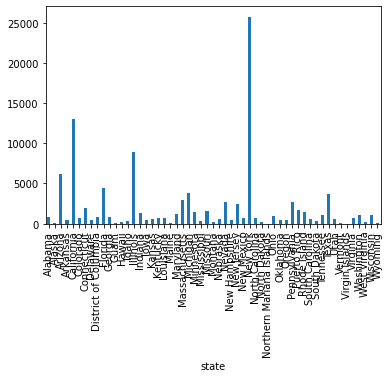

In [49]:
#creating a bar plot with state and the max number of deaths
df30.groupby(['state'])['deaths'].max().plot(kind='bar')

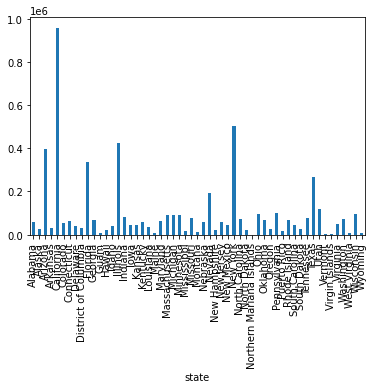

In [51]:
#creating a bar plot with state and the max number of cases
df30.groupby(['state'])['cases'].max().plot(kind='bar')

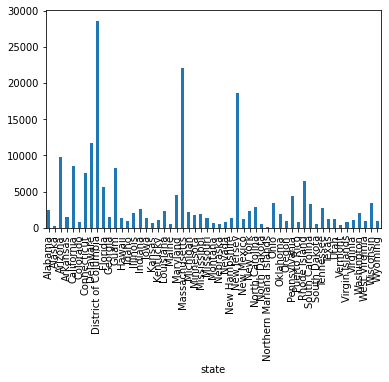

In [56]:
#creating a bar plot with state and the median number of cases
df30.groupby(['state'])['cases'].median().plot(kind='bar')

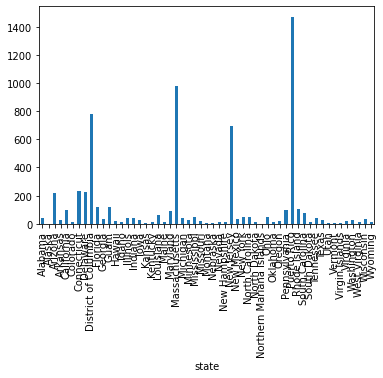

In [81]:
#creating a bar plot with state and the median number of deaths
df30.groupby(['state'])['deaths'].median().plot(kind='bar')
